In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns
from pandas_profiling import ProfileReport

/tmp/ipykernel_32493/1127080296.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
data = pd.read_csv('data/bbc.csv')
data.head()

,Unnamed: 0,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [98]:
labels_dict = {val:a for a, val in enumerate(data['type'].unique())}
data['cat'] = data["type"].apply(lambda x: labels_dict[x])
data

/tmp/ipykernel_32493/2208533876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cat'] = data["type"].apply(lambda x: labels_dict[x])


,Index,type,category_id,news_porter_stemmed,cat
0,0,business,0,risks challenges bcc bcc risks 5196 manufactur...,0
1,1,business,0,davo davos warming antiaid 700000 lifeextend 4...,0
2,2,business,0,quak reinsur wrought apparent 23000 underwat d...,0
3,3,business,0,thermal ntpc selloff ntpc 865 54bn rupees12bn ...,0
4,4,business,0,lacroix lvmh lossmak lacroix parisbas noncor m...,0
...,...,...,...,...,...
2220,2220,tech,4,workshare exposed leaking binding inadvert con...,4
2221,2221,tech,4,tallest whisk 508m tall tfc 101 taipei taiwan ...,4
2222,2222,tech,4,addon adaptor addon successor sensitive onboar...,4
2223,2223,tech,4,bugs warnings midjun proofofconcept laboratory...,4


In [11]:
colslist = ['Index', 'news', 'type', 'category_id']
data.columns = colslist

<AxesSubplot: xlabel='type'>

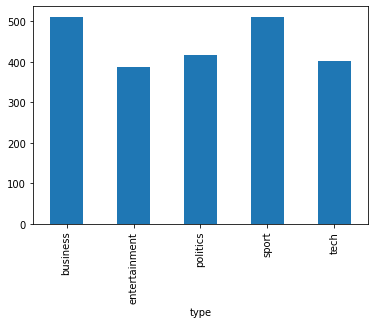

In [26]:
data.groupby("type").Index.count().plot.bar(ylim=0)


In [27]:
data.sample(5, random_state=0)


,Index,news,type,category_id
384,384,World leaders gather to face uncertainty\n \n ...,business,0
1983,1983,IBM puts cash behind Linux push\n \n IBM is sp...,tech,4
985,985,New rules tackle 'sham weddings'\n \n New rule...,politics,2
1386,1386,Double injury blow strikes Wales\n \n Wales ce...,sport,3
1294,1294,Bid to cut court witness stress\n \n New targe...,politics,2


In [28]:


#stop word removal
stopwords = nltk.corpus.stopwords.words('english')



In [29]:
data['news_without_stopwords'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [33]:
print(len(data['news_without_stopwords'][0]))

1549


In [34]:
print(data['news_without_stopwords'])

0       UK economy facing 'major risks' The UK manufac...
1       Aids climate top Davos agenda Climate change f...
2       Asian quake hits European shares Shares Europe...
3       India power shares jump debut Shares India's l...
4       Lacroix label bought US firm Luxury goods grou...
                              ...                        
2220    Warning Windows Word files Writing Microsoft W...
2221    Fast lifts rise record books Two high-speed li...
2222    Nintendo adds media playing DS Nintendo releas...
2223    Fast moving phone viruses appear Security firm...
2224    Hacker threat Apple's iTunes Users Apple's mus...
Name: news_without_stopwords, Length: 2225, dtype: object


In [35]:
ProfileReport(data)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
pf = ProfileReport(data)
pf.to_file('test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
#Porter Stemming
ps = PorterStemmer()

data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(data['news_porter_stemmed'][0])

In [48]:
# Lowercase
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda y: ' '.join(x.lower() for x in y.split()))
print(data['news_porter_stemmed'][0])

uk economi face 'major risks' the uk manufactur sector continu face "seriou challenges" next two years, british chamber commerc (bcc) said. the group' quarterli survey compani found export pick last three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc found whole uk economi still face "major risks" warn growth set slow. it recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur also fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confidence,

In [53]:
# Remove special characters
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]', '')
data['news_porter_stemmed'][0]

/tmp/ipykernel_32493/1729528700.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]', '')


'uk economi face major risks the uk manufactur sector continu face seriou challenges next two years british chamber commerc bcc said the group quarterli survey compani found export pick last three month 2004 best level eight years the rise came despit exchang rate cite major concern however bcc found whole uk economi still face major risks warn growth set slow it recent forecast econom growth slow 3 2004 littl 25 2005 2006 manufacturers domest sale growth fell back slightli quarter survey 5196 firm found employ manufactur also fell job expect lowest level year despit posit news export sector worri sign manufacturing bcc said these result reinforc concern sector persist inabl sustain recovery the outlook servic sector uncertain despit increas export order quarter bcc noted the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004 the reduc threat interest rate increas contribut improv confidence said the bank england rais interest r

In [68]:
freq = pd.Series(" ".join(data['news_porter_stemmed']).split()).value_counts()
freq.head()

the     8121
said    7253
i       3263
mr      3045
it      2701
dtype: int64

In [69]:
filter_freq = freq[freq <= 10]
filter_freq

mccartney     10
cudicini      10
increases     10
hopman        10
coastal       10
              ..
reconvened     1
megastar       1
grants         1
statefund      1
m3u            1
Length: 25195, dtype: int64

In [70]:
list_freq = list(filter_freq.index.values)
print(len(list_freq))

25195


In [73]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: " ".join([word for word in x.split() if word in list_freq]))
data['news_porter_stemmed'][0]


'risks challenges bcc bcc risks 5196 manufacturing bcc inabl bcc noted bcc margins relentless regulations bcc deceler 1218 slack'

In [101]:
data = data[["Index", "type", "cat", "news_porter_stemmed"]]

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [103]:
features = tfidf.fit_transform(data.news_porter_stemmed)
labels = data["cat"]
print(features.shape)
print(labels.shape)

(2225, 2887)
(2225,)


In [110]:
labels_cat_name = {b: a for a, b in labels_dict.items()}
labels_cat_name

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

In [135]:
from sklearn.feature_selection import chi2

N = 3

for class_type, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    
    unigram = [v for v in feature_names if len(v.split()) == 1]
    bigram = [v for v in feature_names if len(v.split()) == 2]
    
    print("# '{}':".format(class_type))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigram[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigram[-N:])))

# 'business':
  . Most correlated unigrams:
       . holdings
       . 08
       . 06
  . Most correlated bigrams:
       . werner seifert
       . herv gaymard
       . inflationari pressures
# 'entertainment':
  . Most correlated unigrams:
       . hanks
       . rereleas
       . sophi
  . Most correlated bigrams:
       . katharin hepburn
       . sophi okonedo
       . zach braff
# 'politics':
  . Most correlated unigrams:
       . manoeuvr
       . topup
       . unions
  . Most correlated bigrams:
       . extremists detained
       . mansfield extremists
       . animos contempt
# 'sport':
  . Most correlated unigrams:
       . christo
       . knockout
       . scorer
  . Most correlated bigrams:
       . wooden spoon
       . svengoran eriksson
       . bayer leverkusen
# 'tech':
  . Most correlated unigrams:
       . codenam
       . addon
       . beta
  . Most correlated bigrams:
       . amazoncom oneclick
       . oneclick shopping
       . hewlett packard


In [143]:
from sklearn.manifold import TSNE

SAMPLE_SIZE = int(features.shape[0] * 0.3)
np.random.seed(0)
indices = np.random.choice(range(features.shape[0]), size=SAMPLE_SIZE, replace=False)

projected_features = TSNE(n_components=2, init="random", random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8dc4036160>
Traceback (most recent call last):
  File "/home/abhishek/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/abhishek/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/abhishek/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/abhishek/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


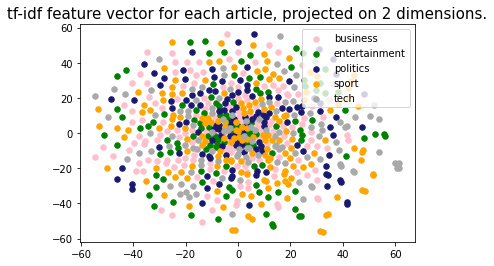

In [144]:
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [145]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



<AxesSubplot: xlabel='model_name', ylabel='accuracy'>

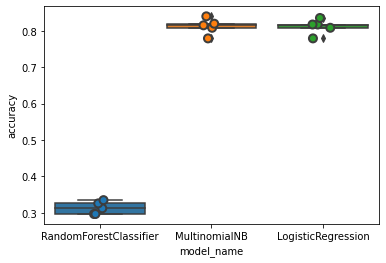

In [146]:


sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)



In [148]:


from sklearn.model_selection import train_test_split
X = data.iloc[:, :16646].values
y = data.iloc[:, -1].values
model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)



Text(0.5, 15.0, 'Predicted')

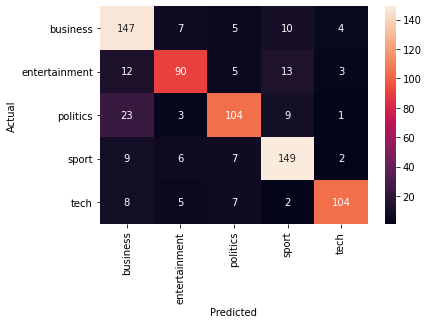

In [151]:


from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.type.values, yticklabels=category_id_df.type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')



In [152]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [154]:


from sklearn.feature_selection import chi2

N = 5
for newstype, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(newstype))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))



# 'business':
  . Top unigrams:
       . 06
       . carriers
       . kremlin
       . 23bn
       . stabilis
  . Top bigrams:
       . herv gaymard
       . inflationari pressures
       . tampa buccan
       . werner seifert
       . sylvain marconnet
# 'entertainment':
  . Top unigrams:
       . playwright
       . sophi
       . superhero
       . nightclub
       . rereleas
  . Top bigrams:
       . wardrob malfunction
       . katharin hepburn
       . sophi okonedo
       . zach braff
       . jeanpierr jeunet
# 'politics':
  . Top unigrams:
       . topup
       . allparti
       . unions
       . treasury
       . resignation
  . Top bigrams:
       . animos contempt
       . mansfield extremists
       . extremists detained
       . holyrood sturgeon
       . troncon ongaro
# 'sport':
  . Top unigrams:
       . christo
       . knockout
       . scorer
       . bogdanov
       . arjen
  . Top bigrams:
       . bayer leverkusen
       . svengoran eriksson
       . wooden spoo

In [155]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'business'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'business'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'



In [158]:


import pickle

with open("model/logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)